<a href="https://colab.research.google.com/github/majid-zamani/CS-SBU-DataMining-Msc-projects/blob/main/MajidMohamadzamani-99422172/Project03/DS_Project03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
import urllib 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

In [208]:
!pip install kaggle

In [209]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"majidqzamani","key":"54ba0ce495dab46e4d7f4bc284924973"}'}

In [210]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [212]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 26.3MB/s]


In [213]:
!ls

kaggle.json  mobile-price-classification.zip  sample_data


In [214]:
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [216]:
test=pd.read_csv('/content/files/test.csv')
train=pd.read_csv('/content/files/train.csv')

In [218]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [220]:
print('Rows     :',train.shape[0])
print('Columns  :',train.shape[1])
print('\nFeatures :\n     :',train.columns.tolist())
print('\nMissing values    :',train.isnull().values.sum())
print('\nUnique values :  \n',train.nunique())

Rows     : 2000
Columns  : 21

Features :
     : ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

Missing values    : 0

Unique values :  
 battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64


In [226]:
train.describe().T.round(decimals=1)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
blue,2000.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
dual_sim,2000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
four_g,2000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
n_cores,2000.0,4.5,2.3,1.0,3.0,4.0,7.0,8.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41c7c28810>,
      dtype=object)

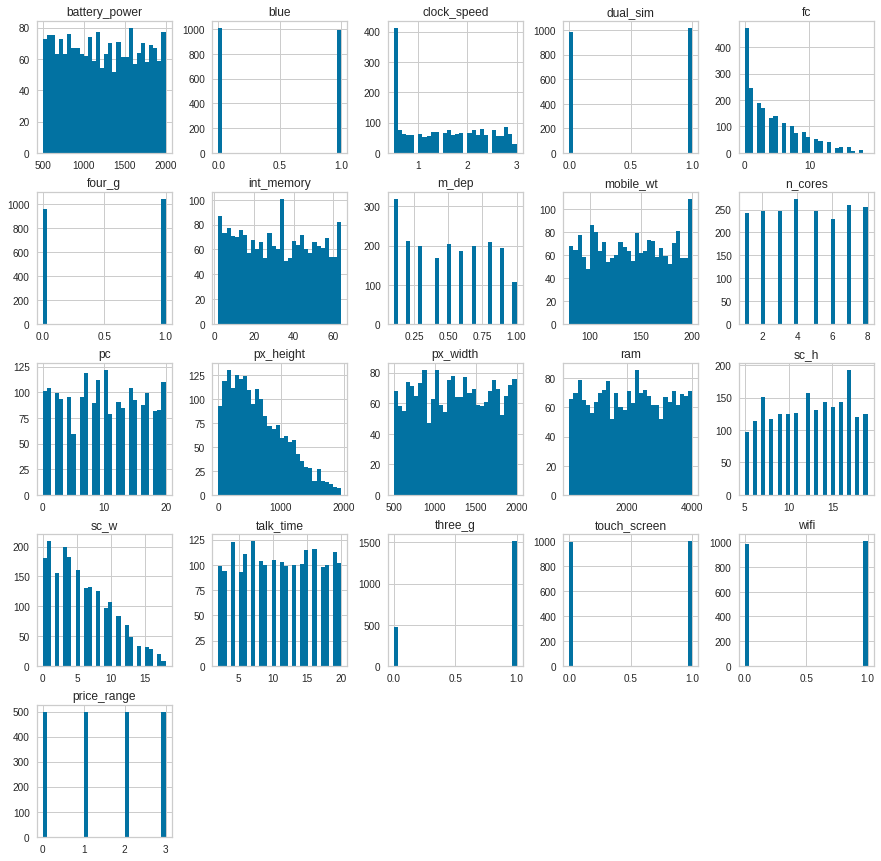

In [227]:
train.hist(bins=30, figsize=(15, 15))

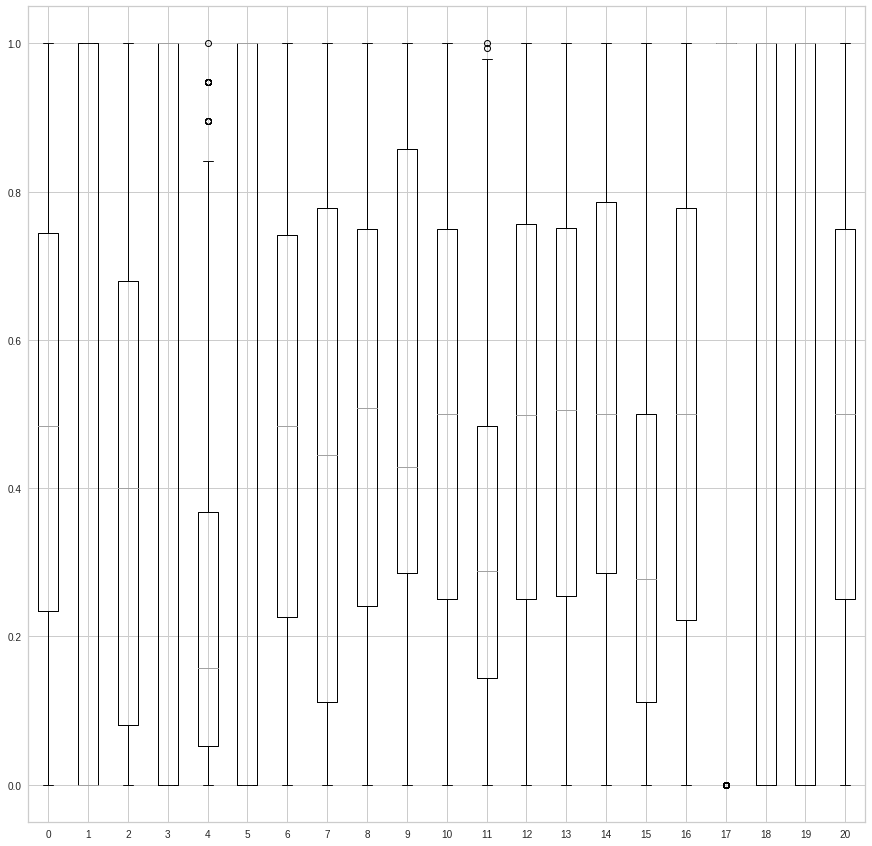

In [228]:
x = train.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_scaled = pd.DataFrame(x_scaled)
data_scaled.boxplot(figsize=(15, 15))

In [229]:
print(train.corr()['price_range'].sort_values())

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64


In [230]:
lowCorrs = list(train.corr()['price_range'].sort_values().keys()[:16]); print("Drop:", lowCorrs)

X = train.drop(['price_range', *lowCorrs], axis=1);print(X.shape)
y = train['price_range'];print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22, shuffle=True)

Drop: ['touch_screen', 'mobile_wt', 'clock_speed', 'm_dep', 'n_cores', 'four_g', 'dual_sim', 'wifi', 'blue', 'talk_time', 'fc', 'sc_h', 'three_g', 'pc', 'sc_w', 'int_memory']
(2000, 4)
(2000,)


In [ ]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

In [232]:
y_pred = model_svm.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print(CM)
CR = classification_report(y_test, y_pred)
print(CR)

[[141   3   0   0]
 [  6 137   2   0]
 [  0   5 148   5]
 [  0   0   4 149]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       144
           1       0.94      0.94      0.94       145
           2       0.96      0.94      0.95       158
           3       0.97      0.97      0.97       153

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [233]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.965

In [234]:
y_pred = model_svm.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print(CM)
CR = classification_report(y_test, y_pred)
print(CR)

[[141   3   0   0]
 [  2 141   2   0]
 [  0   5 151   2]
 [  0   0   7 146]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       144
           1       0.95      0.97      0.96       145
           2       0.94      0.96      0.95       158
           3       0.99      0.95      0.97       153

    accuracy                           0.96       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.96      0.97       600



In [235]:
model_svm = SVC(kernel='sigmoid')
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.018333333333333333

In [236]:
y_pred = model_svm.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print(CM)
CR = classification_report(y_test, y_pred)
print(CR)

[[ 11   0   0 133]
 [ 53   0   0  92]
 [131   9   0  18]
 [153   0   0   0]]
              precision    recall  f1-score   support

           0       0.03      0.08      0.04       144
           1       0.00      0.00      0.00       145
           2       0.00      0.00      0.00       158
           3       0.00      0.00      0.00       153

    accuracy                           0.02       600
   macro avg       0.01      0.02      0.01       600
weighted avg       0.01      0.02      0.01       600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
model_svm = SVC(kernel='poly')
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.9616666666666667

In [238]:
y_pred = model_svm.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print(CM)
CR = classification_report(y_test, y_pred)
print(CR)

[[141   3   0   0]
 [  1 140   4   0]
 [  0   4 150   4]
 [  0   0   7 146]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       144
           1       0.95      0.97      0.96       145
           2       0.93      0.95      0.94       158
           3       0.97      0.95      0.96       153

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [239]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.9583333333333334

In [240]:
y_pred = model_svm.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
print(CM)
CR = classification_report(y_test, y_pred)
print(CR)

[[141   3   0   0]
 [  6 137   2   0]
 [  0   5 148   5]
 [  0   0   4 149]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       144
           1       0.94      0.94      0.94       145
           2       0.96      0.94      0.95       158
           3       0.97      0.97      0.97       153

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



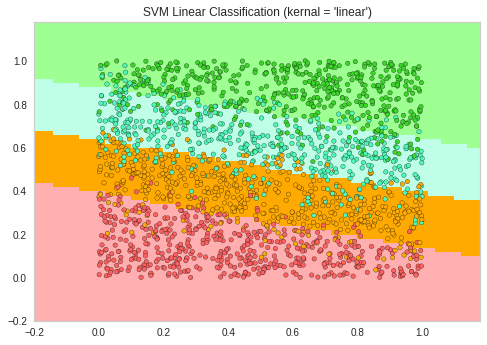

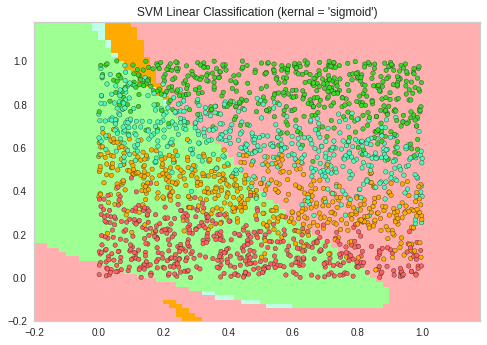

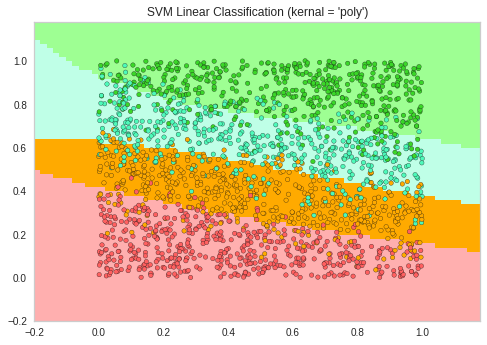

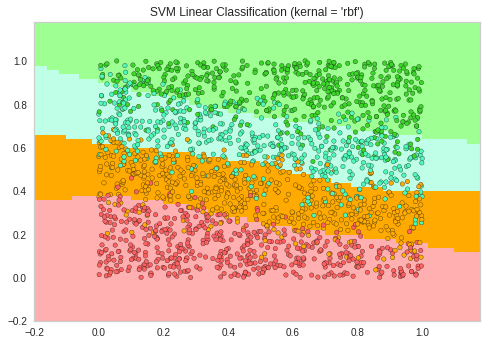

In [241]:
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

scaler = MinMaxScaler()

X = np.array(train.iloc[:,[0,13]])
y = np.array(train['price_range'])
X = scaler.fit_transform(X)
h = .02 
C_param = 1
for kernel in ('linear','sigmoid', 'poly', 'rbf'):

    clf1 = SVC(kernel=kernel,C=C_param)
    clf1.fit(X, y)

    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = '%s')"% (kernel))

plt.show()

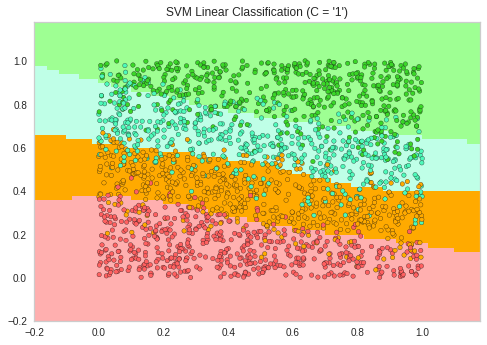

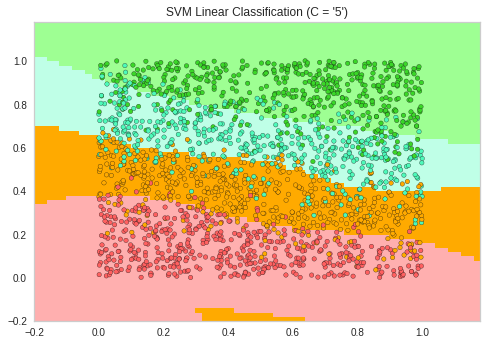

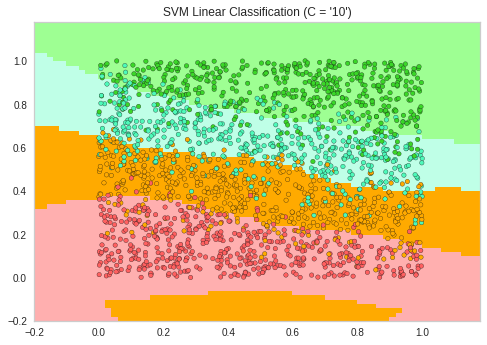

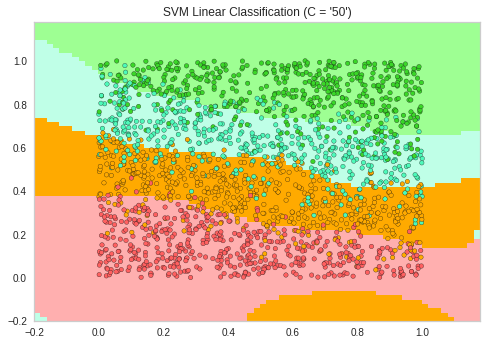

In [242]:

C_param = 1
for C_param in (1,5,10,50):

    clf1 = SVC(C=C_param)
    clf1.fit(X, y)

    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (C = '%s')"% (C_param))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

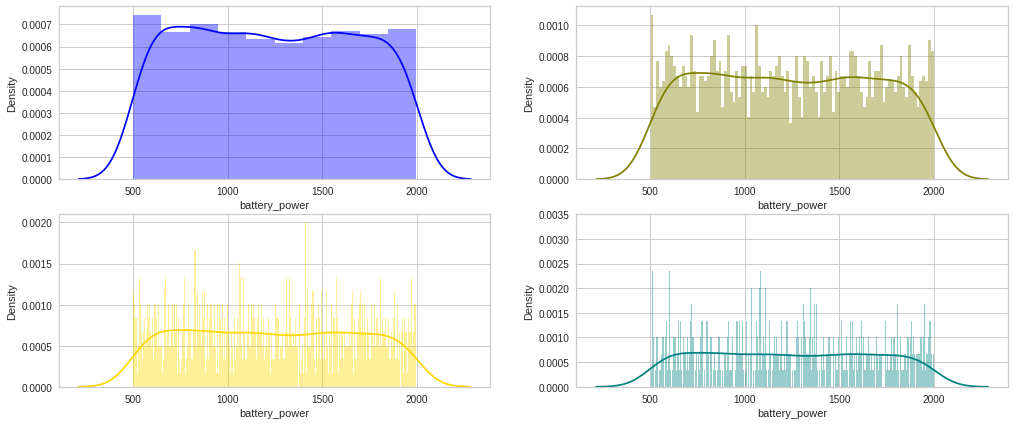

In [248]:
train_new = train["battery_power"]
f, axes = plt.subplots(2, 2, figsize=(17, 7), sharex=False)
sns.distplot( train["battery_power"], bins=10, color="blue", ax=axes[0, 0])
sns.distplot( train["battery_power"], bins=100, color="olive", ax=axes[0, 1])
sns.distplot( train["battery_power"], bins=500, color="gold", ax=axes[1, 0])
sns.distplot( train["battery_power"], bins=1000, color="teal", ax=axes[1, 1])

In [249]:
from sklearn.preprocessing import OneHotEncoder

X_OHE = train[['price_range','dual_sim','four_g','three_g','touch_screen','wifi']]
X_OHE = pd.get_dummies(X_OHE,columns=['price_range','dual_sim','four_g','three_g','touch_screen','wifi'])
X_OHE.head(16)

,price_range_0,price_range_1,price_range_2,price_range_3,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,0,1,0,0,1,0,1,0,1,0,1,0,0,1
1,0,0,1,0,0,1,0,1,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,0,1,0,1,1,0
3,0,0,1,0,1,0,1,0,0,1,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,1,1,0
5,0,1,0,0,0,1,1,0,0,1,1,0,1,0
6,0,0,0,1,1,0,0,1,0,1,1,0,0,1
7,1,0,0,0,0,1,1,0,0,1,0,1,0,1
8,1,0,0,0,1,0,1,0,0,1,1,0,1,0
9,1,0,0,0,0,1,0,1,0,1,1,0,1,0


In [250]:
transformer = FunctionTransformer(np.log1p, validate=True)
LT = train
transformer.transform(LT)
print(LT)

      battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0               842     0          2.2  ...             0     1            1
1              1021     1          0.5  ...             1     0            2
2               563     1          0.5  ...             1     0            2
3               615     1          2.5  ...             0     0            2
4              1821     1          1.2  ...             1     0            1
...             ...   ...          ...  ...           ...   ...          ...
1995            794     1          0.5  ...             1     0            0
1996           1965     1          2.6  ...             1     1            2
1997           1911     0          0.9  ...             1     0            3
1998           1512     0          0.9  ...             1     1            0
1999            510     1          2.0  ...             1     1            3

[2000 rows x 21 columns]


In [251]:
X_OHE = pd.get_dummies(train,columns=['price_range','dual_sim','four_g','three_g','touch_screen','wifi'])
print(X_OHE.shape)
y1 = X_OHE['price_range_0']
print(y1.shape)

X1_train, X1_test, y1_train, y1_test = train_test_split(X_OHE, y1, test_size=0.3, random_state=22, shuffle=True)

model_svm = SVC()
model_svm.fit(X1_train, y1_train)
model_svm.score(X1_test, y1_test)


(2000, 29)
(2000,)


0.9866666666666667

In [252]:
y1_pred = model_svm.predict(X1_test)
CM = confusion_matrix(y1_test, y1_pred)
print(CM)
CR = classification_report(y1_test, y1_pred)
print(CR)

[[450   6]
 [  2 142]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       456
           1       0.96      0.99      0.97       144

    accuracy                           0.99       600
   macro avg       0.98      0.99      0.98       600
weighted avg       0.99      0.99      0.99       600



In [260]:
train_area=train[['battery_power','px_height','px_width','price_range']]
train_area['area'] = train['px_height']*train['px_width']
train_area.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,battery_power,px_height,px_width,price_range,area
0,842,20,756,1,15120
1,1021,905,1988,2,1799140
2,563,1263,1716,2,2167308
3,615,1216,1786,2,2171776
4,1821,1208,1212,1,1464096
